<a href="https://colab.research.google.com/github/kalinakalina/DEDA_Cryptopunks/blob/main/EDA_accessoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd 
import requests
from requests import get
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns



In [3]:
# helper functions
def fix_eth(x):
  x=str(x)
  x=x.replace('Ξ', '')
  x=x.replace('<', '')
  x=x.replace(',', '')
  if 'K' in x:
    x=float(x.replace('K', ''))
    x=x*1000
    return x
  return x

In [ ]:
# import transaction 
file = 'https://raw.githubusercontent.com/kalinakalina/DEDA_Cryptopunks/main/transaction.csv?token=AH46LUSFPS756K3PCIWICNDAUN3MS'
dft = pd.read_csv(file, header=None)
dft.head()

,0,1,2,3,4,5,6,7
0,0,Bid Withdrawn,0x983ace,NaN,2021-05-10,0,250.0,1030000.0
1,1,Bid,0x983ace,NaN,2021-04-11,0,250.0,"537,615"
2,2,Bid Withdrawn,0xd7510a,NaN,2021-03-03,0,100.0,"160,973"
3,3,Bid,0xd7510a,NaN,2021-02-20,0,100.0,"188,897"
4,4,Bid Withdrawn,natealex,NaN,2020-09-16,0,69.0,"25,532"


In [2]:
# import accessoires 
names=['gender', 'acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5', 'acc_6', 'acc_7']
file = 'https://raw.githubusercontent.com/kalinakalina/DEDA_Cryptopunks/main/accessories.csv?token=AH46LUXAUSZ7WKYQHT5CYFDAVEOK2'
df = pd.read_csv(file, header=None, sep='\n')
df = df[0].str.split(',', expand=True)
df.drop(0, axis=1, inplace=True)
df.head()


,1,2,3,4,5,6,7,8
0,Female,Green Eye Shadow,Earring,Blonde Bob,None,None,None,None
1,Male,Smile,Mohawk,None,None,None,None,None
2,Female,Wild Hair,None,None,None,None,None,None
3,Male,Wild Hair,Nerd Glasses,Pipe,None,None,None,None
4,Male,Big Shades,Wild Hair,Earring,Goat,None,None,None


In [4]:
dict={1:'gender', 
      2:  'acc_1',
      3:'acc_2', 
      4: 'acc_3',
      5:'acc_4',
      6: 'acc_5',
      7:'acc_6',
      8:'acc_7'}
df.rename(columns=dict,
          inplace=True)
  
df.head()

,gender,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7
0,Female,Green Eye Shadow,Earring,Blonde Bob,None,None,None,None
1,Male,Smile,Mohawk,None,None,None,None,None
2,Female,Wild Hair,None,None,None,None,None,None
3,Male,Wild Hair,Nerd Glasses,Pipe,None,None,None,None
4,Male,Big Shades,Wild Hair,Earring,Goat,None,None,None


In [5]:
columns = df.select_dtypes(include=[object]).columns
df[columns] = df[columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  10000 non-null  category
 1   acc_1   9992 non-null   category
 2   acc_2   9659 non-null   category
 3   acc_3   6099 non-null   category
 4   acc_4   1598 non-null   category
 5   acc_5   178 non-null    category
 6   acc_6   12 non-null     category
 7   acc_7   1 non-null      category
dtypes: category(8)
memory usage: 92.9 KB


In [6]:
df

,gender,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7
0,Female,Green Eye Shadow,Earring,Blonde Bob,NaN,NaN,NaN,NaN
1,Male,Smile,Mohawk,NaN,NaN,NaN,NaN,NaN
2,Female,Wild Hair,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Wild Hair,Nerd Glasses,Pipe,NaN,NaN,NaN,NaN
4,Male,Big Shades,Wild Hair,Earring,Goat,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9995,Female,Purple Eye Shadow,Straight Hair Dark,NaN,NaN,NaN,NaN,NaN
9996,Male,Cigarette,Earring,Crazy Hair,Smile,NaN,NaN,NaN
9997,Zombie,Front Beard,Cap Forward,NaN,NaN,NaN,NaN,NaN
9998,Female,Wild White Hair,Black Lipstick,Clown Eyes Green,NaN,NaN,NaN,NaN


# Types & Attributes

In [7]:
page = requests.get("https://www.larvalabs.com/cryptopunks/attributes")
soup = BeautifulSoup(page.text, "html.parser")

tr_hist = soup.find_all('table')
df_acc_types = pd.read_html(str(tr_hist))[0]
df_acc_types = pd.DataFrame(df_acc_types.to_records())

dict={'index':'index',
      "('Punk Types', 'Attribute')":'types',
      "('Unnamed: 1_level_0', '#')":'number',
      "('Unnamed: 2_level_0', 'Avail')":'avail',
      "('Unnamed: 3_level_0', 'Avg Sale')":"avg_sale",
      "('Unnamed: 4_level_0', 'Cheapest')":'cheapest',
      "('Unnamed: 5_level_0', 'More Examples')":'more_examples'}
df_acc_types.rename(columns=dict,
          inplace=True)
df_acc_types.columns
df.head()
df_acc_types.avg_sale=df_acc_types.avg_sale.apply(fix_eth)
df_acc_types.cheapest=df_acc_types.cheapest.apply(fix_eth)

df_acc_types.avg_sale = df_acc_types.avg_sale.astype(np.float32)
df_acc_types.cheapest = df_acc_types.cheapest.astype(np.float32)
df_acc_types.types = df_acc_types.types.astype('category')
df_acc_types.drop('more_examples', axis=1, inplace=True)
df_acc_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   index     5 non-null      int64   
 1   types     5 non-null      category
 2   number    5 non-null      int64   
 3   avail     5 non-null      int64   
 4   avg_sale  5 non-null      float32 
 5   cheapest  4 non-null      float32 
dtypes: category(1), float32(2), int64(3)
memory usage: 493.0 bytes


## Feature explanation
* number: the amount of crpytopunk that have this feature
* avail: amount of crpytopunks currently available for sale
* avg_sale: avg sale over the last 90 days
* cheapest: cheapest punktwith this attribute that is currently for sale
* more example: dropped as it is not readable like this

In [8]:
# scraping attributes data and transforming it
tr_hist = soup.find_all('table')
df_acc_att = pd.read_html(str(tr_hist))[1]

df_acc_att = pd.DataFrame(df_acc_att.to_records())
df_acc_att.columns
dict={'index':'index',
      "('Attributes', 'Attribute')":'attributes',
      "('Unnamed: 1_level_0', '#')":'number',
      "('Unnamed: 2_level_0', 'Avail')":'avail',
      "('Unnamed: 3_level_0', 'Avg Sale')":"avg_sale",
      "('Unnamed: 4_level_0', 'Cheapest')":'cheapest',
      "('Unnamed: 5_level_0', 'More Examples')":'more_examples'}
df_acc_att.rename(columns=dict,
          inplace=True)
df_acc_att.columns

df_acc_att.avg_sale=df_acc_att.avg_sale.apply(fix_eth)
df_acc_att.cheapest=df_acc_att.cheapest.apply(fix_eth)

df_acc_att.avg_sale = df_acc_att.avg_sale.astype(np.float32)
df_acc_att.cheapest = df_acc_att.cheapest.astype(np.float32)
df_acc_att.attributes = df_acc_att.attributes.astype('category')
df_acc_att.drop('more_examples', axis=1, inplace=True)
df_acc_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       87 non-null     int64   
 1   attributes  87 non-null     category
 2   number      87 non-null     int64   
 3   avail       87 non-null     int64   
 4   avg_sale    87 non-null     float32 
 5   cheapest    87 non-null     float32 
dtypes: category(1), float32(2), int64(3)
memory usage: 6.1 KB


### Graphical discovery for attributes

In [9]:
df_acc_att.sort_values(by=['avg_sale'], ascending=False)

,index,attributes,number,avail,avg_sale,cheapest
0,0,Beanie,44,12,160.080002,220.000000
2,2,Pilot Helmet,54,12,106.309998,110.000000
4,4,Orange Side,68,12,86.419998,70.000000
3,3,Tiara,55,12,85.940002,89.989998
36,36,Hoodie,259,40,62.750000,52.250000
...,...,...,...,...,...,...
56,56,Peak Spike,303,40,23.430000,17.230000
73,73,Stringy Hair,463,59,22.930000,15.500000
67,67,Mohawk,441,58,22.920000,16.150000
68,68,Mohawk Thin,441,64,22.549999,15.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe91f78ce50>,
      dtype=object)

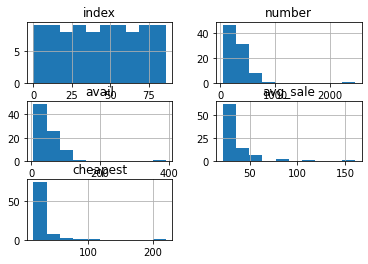

In [10]:
df_acc_att.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


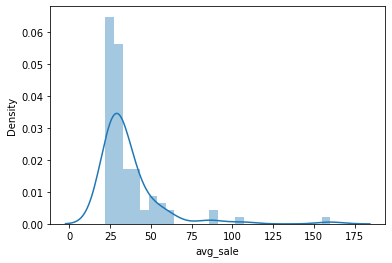

In [11]:
sns.distplot(df_acc_att.avg_sale)

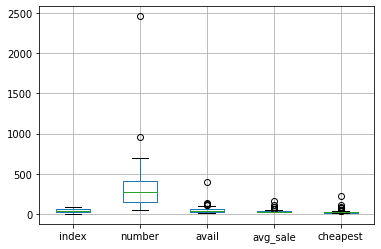

In [12]:
df_acc_att.boxplot()

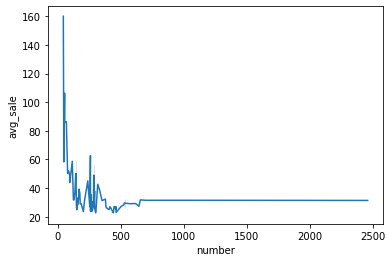

In [13]:
#number of punks that have the same feature compared to average sale price over time
sns.lineplot(x=df_acc_att.number, y=df_acc_att.avg_sale)

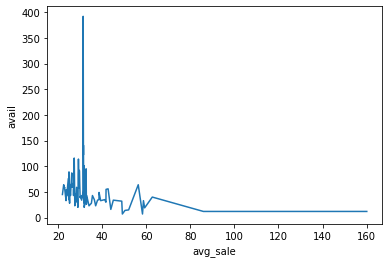

In [14]:
sns.lineplot(x=df_acc_att.avg_sale, y=df_acc_att.avail)

# Dummy Encode

In [15]:
df_test=df.copy()

In [16]:
list_att = df_acc_att.attributes

In [17]:
list_att

0              Beanie
1              Choker
2        Pilot Helmet
3               Tiara
4         Orange Side
           ...       
82               Mole
83    Purple Lipstick
84       Hot Lipstick
85          Cigarette
86            Earring
Name: attributes, Length: 87, dtype: category
Categories (87, object): ['3D Glasses', 'Bandana', 'Beanie', 'Big Beard', ..., 'Welding Goggles',
                          'Wild Blonde', 'Wild Hair', 'Wild White Hair']

In [18]:
g = pd.DataFrame(columns=list_att)

g.rename(columns={'index':'number'},
          inplace=True)
g

attributes,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,Pigtails,Pink With Hat,Top Hat,Spots,Rosy Cheeks,Blonde Short,Wild White Hair,Cowboy Hat,Wild Blonde,Straight Hair Blonde,Big Beard,Red Mohawk,Half Shaved,Blonde Bob,Vampire Hair,Clown Hair Green,Straight Hair Dark,Straight Hair,Silver Chain,Dark Hair,Purple Hair,Gold Chain,Medical Mask,Tassle Hat,Fedora,Police Cap,Clown Nose,Smile,Cap Forward,Hoodie,Front Beard Dark,Frown,Purple Eye Shadow,...,Luxurious Beard,Mustache,Normal Beard Black,Normal Beard,Eye Mask,Goat,Do-rag,Shaved Head,Muttonchops,Peak Spike,Pipe,VR,Cap,Small Shades,Clown Eyes Green,Clown Eyes Blue,Headband,Crazy Hair,Knitted Cap,Mohawk Dark,Mohawk,Mohawk Thin,Frumpy Hair,Wild Hair,Messy Hair,Eye Patch,Stringy Hair,Bandana,Classic Shades,Shadow Beard,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring


In [19]:
df.head()

,gender,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7
0,Female,Green Eye Shadow,Earring,Blonde Bob,NaN,NaN,NaN,NaN
1,Male,Smile,Mohawk,NaN,NaN,NaN,NaN,NaN
2,Female,Wild Hair,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Wild Hair,Nerd Glasses,Pipe,NaN,NaN,NaN,NaN
4,Male,Big Shades,Wild Hair,Earring,Goat,NaN,NaN,NaN


In [ ]:
df.loc[df.acc_1=='Earring', 'acc_1':'acc_7']

In [24]:
if df.loc[1,:].str.contains('Smile').any():
    print("TX is there")

TX is there


In [32]:
x=g.copy()
x

attributes,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,Pigtails,Pink With Hat,Top Hat,Spots,Rosy Cheeks,Blonde Short,Wild White Hair,Cowboy Hat,Wild Blonde,Straight Hair Blonde,Big Beard,Red Mohawk,Half Shaved,Blonde Bob,Vampire Hair,Clown Hair Green,Straight Hair Dark,Straight Hair,Silver Chain,Dark Hair,Purple Hair,Gold Chain,Medical Mask,Tassle Hat,Fedora,Police Cap,Clown Nose,Smile,Cap Forward,Hoodie,Front Beard Dark,Frown,Purple Eye Shadow,...,Luxurious Beard,Mustache,Normal Beard Black,Normal Beard,Eye Mask,Goat,Do-rag,Shaved Head,Muttonchops,Peak Spike,Pipe,VR,Cap,Small Shades,Clown Eyes Green,Clown Eyes Blue,Headband,Crazy Hair,Knitted Cap,Mohawk Dark,Mohawk,Mohawk Thin,Frumpy Hair,Wild Hair,Messy Hair,Eye Patch,Stringy Hair,Bandana,Classic Shades,Shadow Beard,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring


In [41]:
df.shape[0].range()

10000

In [42]:
for counter in range(df.shape[0]):
  for i in g:
    if df.loc[counter,:].str.contains(i).any():
      # print(counter, ' contains ', i)
      x.loc[counter,i] = 1



x.to_csv('accessories_transformed.csv', mode='w', index=False)
      
    